### Преподаватель: Вячеслав Потапов
# Дипломная работа по курсу «Python для анализа данных»
1.	Загрузить файл hr.csv (можно найти во сложении к заданию)
2.	Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
3.	Рассчитать и визуализировать корреляционную матрицу для переменных
4.	Визуализировать несколько взаимосвязей между переменными
5.	С использованием t-test статистики проверить взаимосвязи между несколькими переменными
6.	Рассчитать сколько работников работает в каждом департаменте
7.	Показать распределение сотрудников по зарплатам
8.	Показать распределение сотрудников по зарплатам совместно с департаментами
9.	Сколько сотрудников покинули компанию
10.	Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
11.	Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте


In [1]:
import numpy as np
import pandas as pd

import statistics
from scipy.stats import t
from scipy.stats import norm
from scipy import stats


import io
import requests

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style='white')
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


from IPython.display import Image

### 1. Загрузить файл hr.csv (можно найти во сложении к заданию)

In [2]:
hr=pd.read_csv('HR\HR.csv')
hr.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

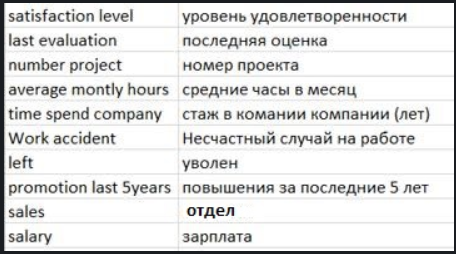

In [3]:
Image('HR/hr.png', width=400)

In [4]:
# в сете 14999 строк и 10 столбцов, пропусков нет
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Заменим salary на числа
def enc_salary(row):
    if row.salary == 'low':
        return 0
    if row.salary == 'medium':
        return 1
    return 2

hr['salary_cat'] = hr.apply(enc_salary, axis = 1)

In [6]:
columns = hr.columns
columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'salary_cat'],
      dtype='object')

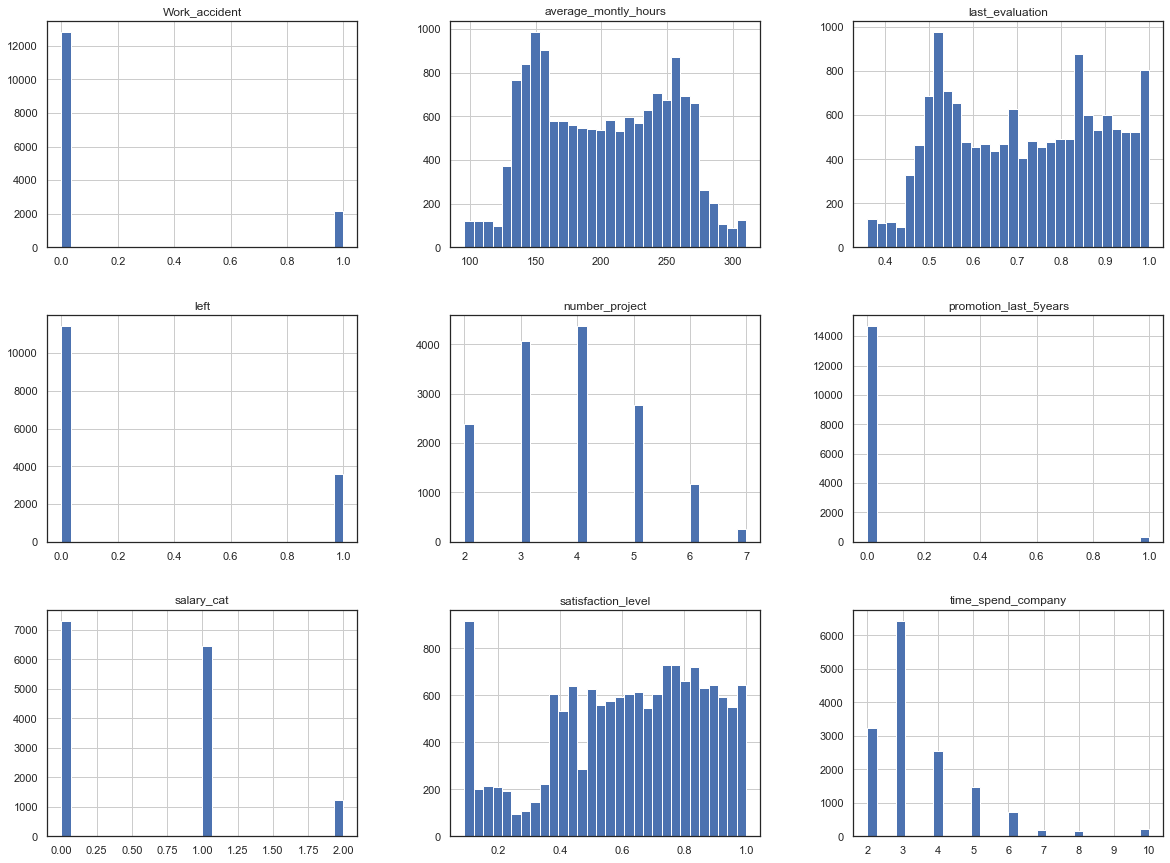

In [7]:
hr.hist(bins=30, figsize=(20,15))
plt.show()

### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [8]:
# основные статистики - среднее, ст. отклонение, минимум, максимум, квартили
hr_stats = hr.describe().T
hr_stats.rename(columns={'50%': 'median'}, inplace=True)
hr_stats.head(10)

count        mean        std    min     25%  median  \
satisfaction_level     14999.0    0.612834   0.248631   0.09    0.44    0.64   
last_evaluation        14999.0    0.716102   0.171169   0.36    0.56    0.72   
number_project         14999.0    3.803054   1.232592   2.00    3.00    4.00   
average_montly_hours   14999.0  201.050337  49.943099  96.00  156.00  200.00   
time_spend_company     14999.0    3.498233   1.460136   2.00    3.00    3.00   
Work_accident          14999.0    0.144610   0.351719   0.00    0.00    0.00   
left                   14999.0    0.238083   0.425924   0.00    0.00    0.00   
promotion_last_5years  14999.0    0.021268   0.144281   0.00    0.00    0.00   
salary_cat             14999.0    0.594706   0.637183   0.00    0.00    1.00   

                          75%    max  
satisfaction_level       0.82    1.0  
last_evaluation          0.87    1.0  
number_project           5.00    7.0  
average_montly_hours   245.00  310.0  
time_spend_company       4.00   10.0  
Work_accident            0.00    1.0  
left                     0.00    1.0  
promotion_last_5years    0.00    1.0  
salary_cat               1.00    2.0

In [9]:
# основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
def try_mode(n):
    try:
        return  statistics.mode(hr[n])
    except:
        return 'no mode'
    
hr_m = pd.DataFrame({'mode': [try_mode(n) for n in hr]}, index=columns)
hr_stats = hr_stats.join(hr_m, how='outer')[['mean', 'median', 'mode', 'min', 'max', 'std']]
hr_stats
# average_montly_hours не имеет моды, категориальные переменные (salary и sales) имеют только моду 

mean  median     mode    min    max        std
Work_accident            0.144610    0.00        0   0.00    1.0   0.351719
average_montly_hours   201.050337  200.00  no mode  96.00  310.0  49.943099
last_evaluation          0.716102    0.72     0.55   0.36    1.0   0.171169
left                     0.238083    0.00        0   0.00    1.0   0.425924
number_project           3.803054    4.00        4   2.00    7.0   1.232592
promotion_last_5years    0.021268    0.00        0   0.00    1.0   0.144281
salary                        NaN     NaN      low    NaN    NaN        NaN
salary_cat               0.594706    1.00        0   0.00    2.0   0.637183
sales                         NaN     NaN    sales    NaN    NaN        NaN
satisfaction_level       0.612834    0.64      0.1   0.09    1.0   0.248631
time_spend_company       3.498233    3.00        3   2.00   10.0   1.460136

### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [11]:
round(hr.corr(), 4).style.background_gradient(cmap='RdYlGn')

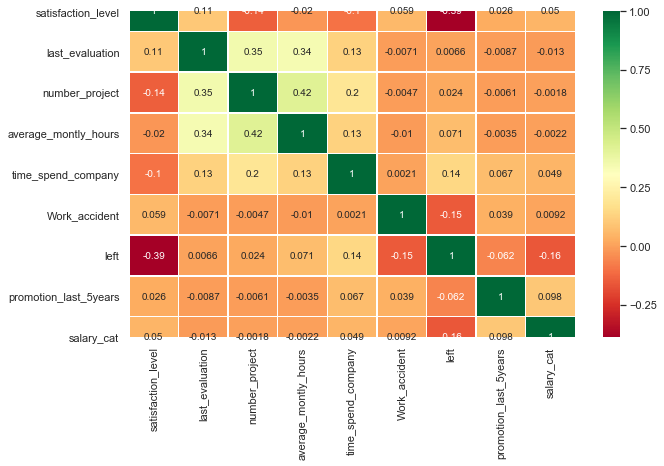

In [14]:
sns.heatmap(hr.corr(),annot=True,cmap='RdYlGn',linewidths=0.5)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

* Есть слабая корреляция между средними отработанными за месяц часами и последней полученной оценкой
* Есть слабая обратная корреляция между уровнем удовлетворенности и увольнением
* Видна корреляция между номером проекта и количеством отработанных часов, но так как номер проекта - категориальная переменная, то рост часов с ростом номера проекта - совпадение

### 4. Визуализировать несколько взаимосвязей между переменными

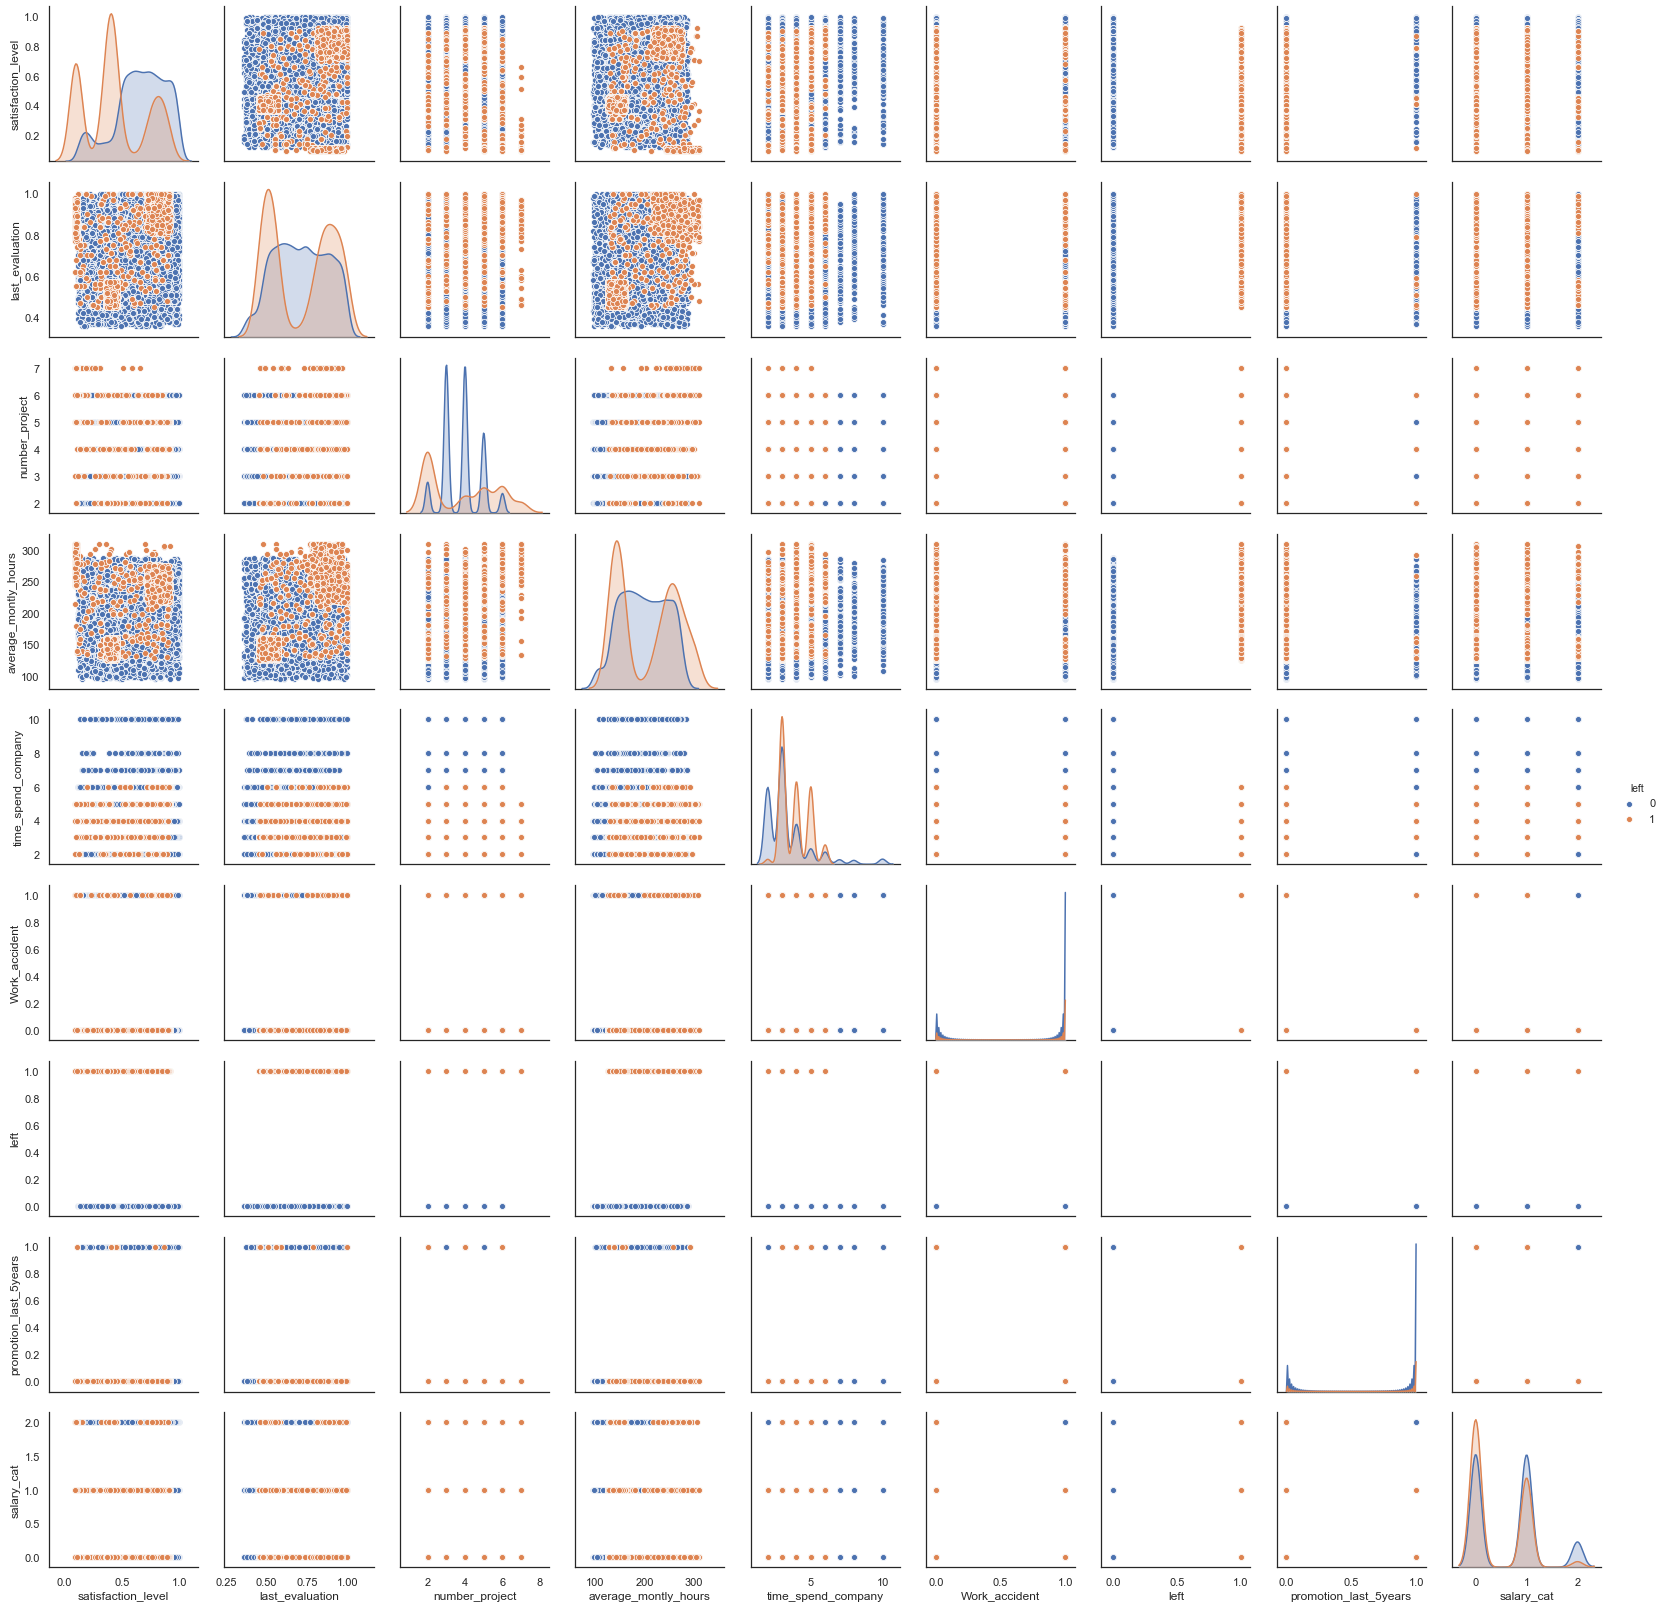

In [16]:
np.seterr(divide='ignore', invalid='ignore')


fig = sns.pairplot(data = hr, hue='left')
plt.show()

* ярко выраженных зависимостей между переменными не наблюдается, как и в матрице корреляций
* видно, что покинувшие компанию сотрудники имели более низкий уровень удовлетворенности, работали либо слишком мало, либо слишком много часов по сравнению с оставшимися сотрудниками, также имели или более низкую или более высокую оценку по сравнению с оставшимися (т.е. уходили худшие и лучшие), ушедшие, в основном, отработали в комапнии 3-5 лет, тогда как среди оставшихся больше новичков

Text(1.7, 1.12, 'Left')

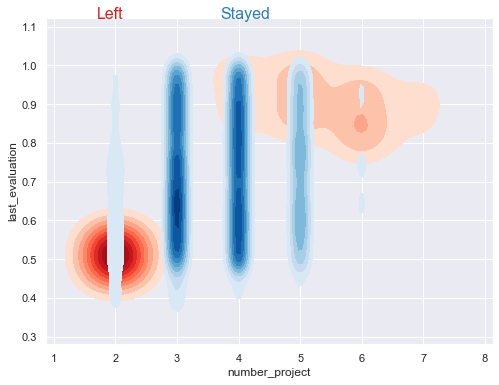

In [17]:
sns.set(style="darkgrid")

left = hr[hr.left == 1]
stayed = hr[hr.left == 0]

f, ax = plt.subplots(figsize=(8, 6))

ax = sns.kdeplot(left.number_project, left.last_evaluation, cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(stayed.number_project, stayed.last_evaluation, cmap="Blues", shade=True, shade_lowest=False)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(3.7, 1.12, "Stayed", size=16, color=blue)
ax.text(1.7, 1.12, "Left", size=16, color=red)

* более высокую оценку получили сотрудники на проектках 5-7, низкую - на проекте 2
* большинство сотрудников, работавших на проектах 2, 6 и 7 уволились, тогда как сотрудники на проектах 3, 4 и 5 продолжают работать

Text(1.7, 1.12, 'Left')

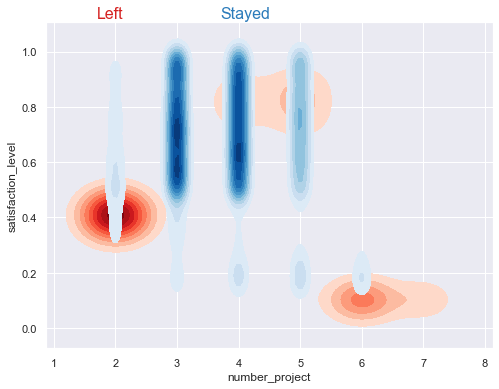

In [18]:
f, ax = plt.subplots(figsize=(8, 6))

ax = sns.kdeplot(left.number_project, left.satisfaction_level, cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(stayed.number_project, stayed.satisfaction_level, cmap="Blues", shade=True, shade_lowest=False)

ax.text(3.7, 1.12, "Stayed", size=16, color=blue)
ax.text(1.7, 1.12, "Left", size=16, color=red)

* при высокой оценке, у сотрудников на проектах 6 и 7 очень низкий уровень удовлетворенности
* у сотрудников на 2 проекте и оценка низкая, и уровень удовлетворенности
* на проволжающихся проектах 3, 4 и 5 уровень удовлетворенности выше, чем на тех, где большинство сотрудников уволены (2, 6 и 7)

Text(1.7, 360, 'Left')

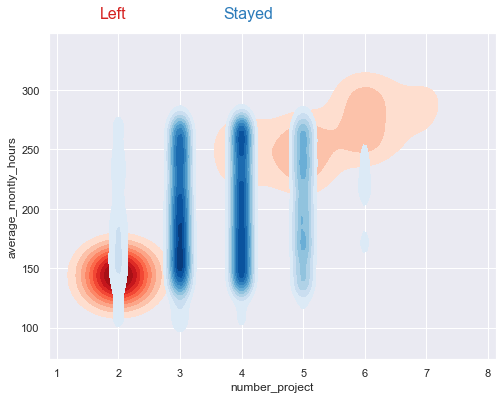

In [19]:
f, ax = plt.subplots(figsize=(8, 6))

ax = sns.kdeplot(left.number_project, left.average_montly_hours, cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(stayed.number_project, stayed.average_montly_hours, cmap="Blues", shade=True, shade_lowest=False)

ax.text(3.7, 360, "Stayed", size=16, color=blue)
ax.text(1.7, 360, "Left", size=16, color=red)

* на проектах 6 и 7 количество отработанных часов выше - что коррелирует с более высокой оценкой
* на проекте 2 количество отработанных часов самое низкое, как и оценки

Text(3.2, 1.12, 'Left')

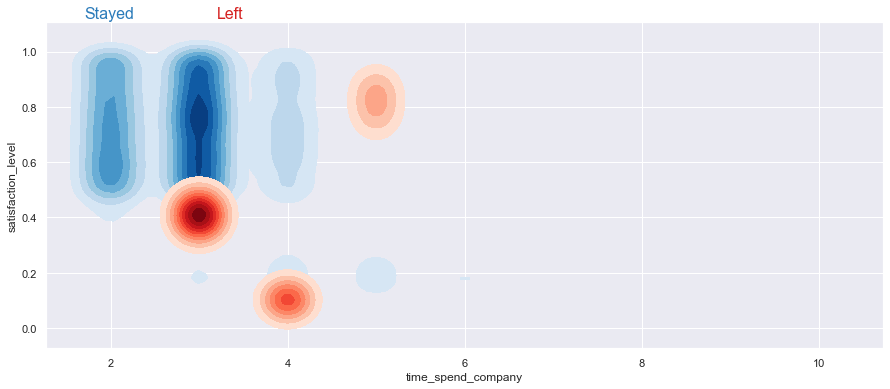

In [20]:
f, ax = plt.subplots(figsize=(15, 6))

ax = sns.kdeplot(stayed.time_spend_company, stayed.satisfaction_level, cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(left.time_spend_company, left.satisfaction_level, cmap="Reds", shade=True, shade_lowest=False)

ax.text(1.7, 1.12, "Stayed", size=16, color=blue)
ax.text(3.2, 1.12, "Left", size=16, color=red)

* уровень удовлетворенности снижается с 3 года
* больше всего сотрудников уходит в 3-4 год
* сотрудники 3-4 года с низком уровнем удовлетворенности - в группе особого риска по увольнениям (или у них уровень удовлетворенности низкий из-за того, что их проекты заканчиваются и их увольняют)

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [21]:
# Гипотеза 1
# Среднее количество отработанных часов у сотрудников с низким и высоким уровнем удовлетворенности не отличается

low = hr[hr.satisfaction_level <= 0.44]['average_montly_hours']
high = hr[hr.satisfaction_level >= 0.82]['average_montly_hours']

min_len = min(len(low), len(high))

low_s = low.sample(min_len)
high_s = high.sample(min_len)

print(statistics.variance(low_s), statistics.variance(high_s))

stats.ttest_ind(low_s, high_s, equal_var=False)

# p-value < 0.05, 
# значит отвергаем нулевую гипотезу - 
# т.е. количество отработанных часов для сотрудников с низкой и высокой удовлетворенностью статистически отличается

3720.433702090569 1918.521542346708


Ttest_indResult(statistic=-10.279845587632714, pvalue=1.3094013822731976e-24)

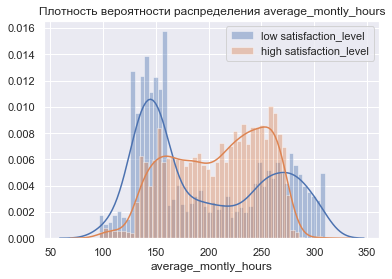

In [22]:
sns.distplot(low, 50)
sns.distplot(high, 50)
plt.title('Плотность вероятности распределения average_montly_hours')
plt.legend(['low satisfaction_level', 'high satisfaction_level'])
plt.show()

In [23]:
# Гипотеза 2
# Уровень удовлетворенности не зависит от последней оценки

low = hr[hr.last_evaluation <= 0.56]['satisfaction_level']
high = hr[hr.last_evaluation >= 0.87]['satisfaction_level']

min_len = min(len(low), len(high))

low_s = low.sample(min_len)
high_s = high.sample(min_len)

print(statistics.variance(low_s), statistics.variance(high_s))

stats.ttest_ind(low_s, high_s, equal_var=False)

# p-value < 0.05, 
# значит отвергаем нулевую гипотезу - 
# т.е. есть зависимость между оценкой и уровнем удовлетворенности сотрудников

0.04361811172800331 0.07565751666082551


Ttest_indResult(statistic=-15.160193886933337, pvalue=3.99992567876811e-51)

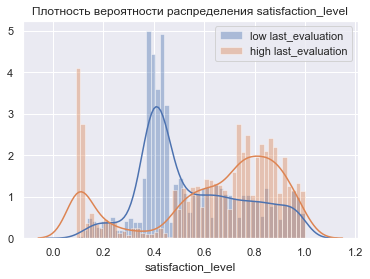

In [24]:
sns.distplot(low, 50)
sns.distplot(high, 50)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['low last_evaluation', 'high last_evaluation'])
plt.show()

In [25]:
# Гипотеза 3
# Уровень удовлетворенности не зависит от зарплаты

low = hr[hr.salary == 'low']['satisfaction_level']
high = hr[hr.salary == 'high']['satisfaction_level']

min_len = min(len(low), len(high))

low_s = low.sample(min_len)
high_s = high.sample(min_len)

print(statistics.variance(low_s), statistics.variance(high_s))

stats.ttest_ind(low_s, high_s)

# p-value < 0.05, 
# значит отвергаем нулевую гипотезу - 
# т.е. есть зависимость между уровнем зарплаты и уровнем удовлетворенности сотрудников

0.06621172282351341 0.05143428811745715


Ttest_indResult(statistic=-4.117377691982257, pvalue=3.957804605158223e-05)

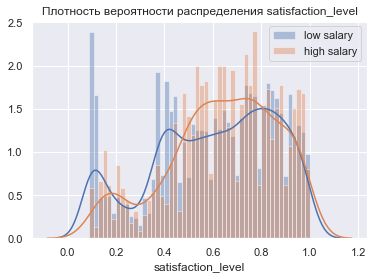

In [26]:
sns.distplot(low, 50)
sns.distplot(high, 50)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['low salary', 'high salary'])
plt.show()

In [27]:
# Гипотеза 4
# Средние отработанные часы не зависят от зарплаты

low = hr[hr.salary == 'low']['average_montly_hours']
high = hr[hr.salary == 'high']['average_montly_hours']

min_len = min(len(low), len(high))

low_s = low.sample(min_len)
high_s = high.sample(min_len)

print(statistics.variance(low_s), statistics.variance(high_s))

stats.ttest_ind(low_s, high_s)

# p-value > 0.05, 
# принимаем нулевую гипотезу - средние часы не зависят от уровня ЗП

2490.6831605329735 2276.2866157553117


Ttest_indResult(statistic=1.0130457480815698, pvalue=0.3111374528256146)

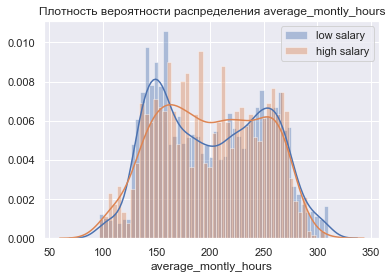

In [28]:
sns.distplot(low, 50)
sns.distplot(high, 50)
plt.title('Плотность вероятности распределения average_montly_hours')
plt.legend(['low salary', 'high salary'])
plt.show()

In [29]:
# Гипотеза 5
# Последняя оценка для уволившихся и оставшихся сотрудников не отличается

left = hr[hr.left == 1]['last_evaluation']
stayed = hr[hr.left == 0]['last_evaluation']

min_len = min(len(left), len(stayed))

left_s = left.sample(min_len)
stayed_s = stayed.sample(min_len)

print(statistics.variance(left_s), statistics.variance(stayed_s))

stats.ttest_ind(left_s, stayed_s)

# p-value > 0.05, 
# значит принимаем нулевую гипотезу - оценка не отличается для ушедших и оставшихся

0.03907475595110629 0.025203404612475066


Ttest_indResult(statistic=0.974225992241865, pvalue=0.329977345649742)

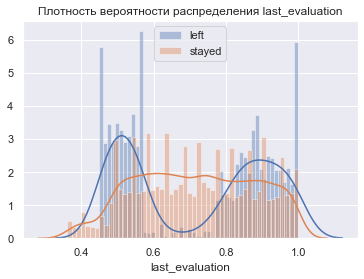

In [30]:
sns.distplot(left, 50)
sns.distplot(stayed, 50)
plt.title('Плотность вероятности распределения last_evaluation')
plt.legend(['left', 'stayed'])
plt.show()

# визуально видно, что уходили стотрудники либо с низкой, либо в высокой оценкой

In [31]:
# Гипотеза 6
# Уровень удовлетворенности для сотрудников получивших и не получивших повышение не отличается

promo = hr[hr.promotion_last_5years == 1]['satisfaction_level']
no_promo = hr[hr.promotion_last_5years == 0]['satisfaction_level']

min_len = min(len(promo), len(no_promo))

promo_s = low.sample(min_len)
no_promo_s = high.sample(min_len)

print(statistics.variance(promo_s), statistics.variance(no_promo_s))

stats.ttest_ind(promo_s, no_promo_s)

# p-value > 0.05, 
# принимаем нулевую гипотезу - нет статистически значимой разницы между сотрудниками, которые получили и не получили повышение

2957.8324165533013 2441.819660495653


Ttest_indResult(statistic=1.1086252431751755, pvalue=0.2680109300106503)

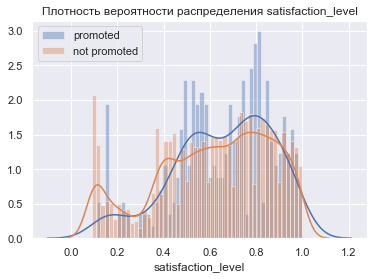

In [32]:
sns.distplot(promo, 50)
sns.distplot(no_promo, 50)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['promoted', 'not promoted'])
plt.show()

### 6. Рассчитать сколько работников работает в каждом департаменте

In [33]:
df = hr.groupby(['sales', 'salary', 'left']).count().reset_index()
df['hc'] = df['last_evaluation']
df['status'] = np.where(df['left']==1, 'left', 'stayed')
df['Index'] = 'company'

In [34]:
hr.groupby('sales').count()['left'].reset_index().style.bar()

In [35]:
fig = px.treemap(df, path=['Index', 'sales'], values='hc')
fig.update_layout(title_text='HC by Department')

fig.data[0].textinfo = 'label+value+percent parent'
fig.show()

В компании больше всего продажников, а также технических специалистов и специалистов службы поддержки

### 7. Показать распределение сотрудников по зарплатам

In [37]:
hr.groupby('salary').count()['left'].reset_index().style.bar()

In [38]:
fig = px.treemap(df, path=['Index', 'salary'], values='hc')
fig.update_layout(title_text='HC by Salary')

fig.data[0].textinfo = 'label+text+value+percent parent'
fig.show()

Почти половина сотрудников получают низкую зарплату, только 8 % - высокую

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [39]:
hr.groupby(['sales', 'salary']).count()['left'].unstack('salary')

salary       high   low  medium
sales                          
IT             83   609     535
RandD          51   364     372
accounting     74   358     335
hr             45   335     359
management    225   180     225
marketing      80   402     376
product_mng    68   451     383
sales         269  2099    1772
support       141  1146     942
technical     201  1372    1147

In [40]:
fig = px.treemap(df, path=['Index', 'sales', 'salary'], values='hc')
fig.update_layout(title_text='HC by Department and Salary')

fig.data[0].textinfo = 'label+text+value+percent parent'
fig.show()

Кроме менеджмента, распределение по зарплатам в разных департаментах отличается незначительно

### 9. Сколько сотрудников покинули компанию

In [41]:
df1 = hr.groupby(['sales', 'salary', 'left', 'number_project']).count().reset_index()
df1['hc'] = df1['last_evaluation']
df1['np'] = df1['number_project'].apply(str)
df1['status'] = np.where(df1['left']==1, 'left', 'stayed')
df1['Index'] = 'company'

In [42]:
fig = px.treemap(df1, path=['Index', 'status'], values='hc')
fig.update_layout(title_text='HC Left / Stayed')

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

In [43]:
fig = px.treemap(df1, path=['Index', 'np', 'status'], values='hc')
fig.update_layout(title_text='HC Left / Stayed by Project')

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

Видно, что компания проектно-ориентированная и разные проекты находятся на разных стадиях жизненного цикла:
* проект 7 закрыт
* проекты 6 и 2 - на завершающем этапе, больше половины сотрудников уволены
* проект 5 также сворачивается
* проекты 3 и 4 активные

In [44]:
fig = px.treemap(df, path=['Index', 'status', 'sales'], values='hc')
fig.update_layout(title_text='HC Left / Stayed by Department')

fig.data[0].textinfo = 'label+text+value+percent parent'
fig.show()

Распределение уволенных и оставшихся по департаментам примерно похоже, за исключением менеджмента

In [45]:
fig = px.treemap(df, path=['Index', 'status', 'salary'], values='hc')
fig.update_layout(title_text='HC Left / Stayed by Salary')

fig.data[0].textinfo = 'label+text+value+percent parent'
fig.show()

Среди уволенных очень мало высокооплачиваемых сотрудников, а доля низкооплачиваемых - выше, чем среди оставшихся

### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

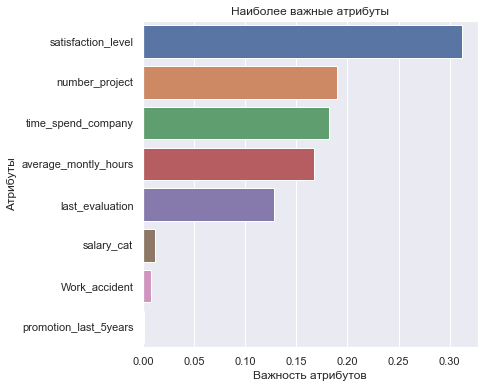

In [53]:
# используем модель Random Forest для классификации признаков
# частичная обработка признаков
    
y = hr[['left']]

df = hr.drop(['sales', 'salary', 'left'],axis = 1)


to_norm = df[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']]
headers = list(to_norm.columns.values)

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(to_norm)
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = headers

df_norm
X = df_norm.join(df[['number_project', 'Work_accident', 'promotion_last_5years', 'salary_cat']])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")

plt.show()

In [54]:
# качество модели
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3408
           1       0.99      0.97      0.98      1092

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



0.9906666666666667

#### Посмотрим распределение характиристик по проектам отдельно

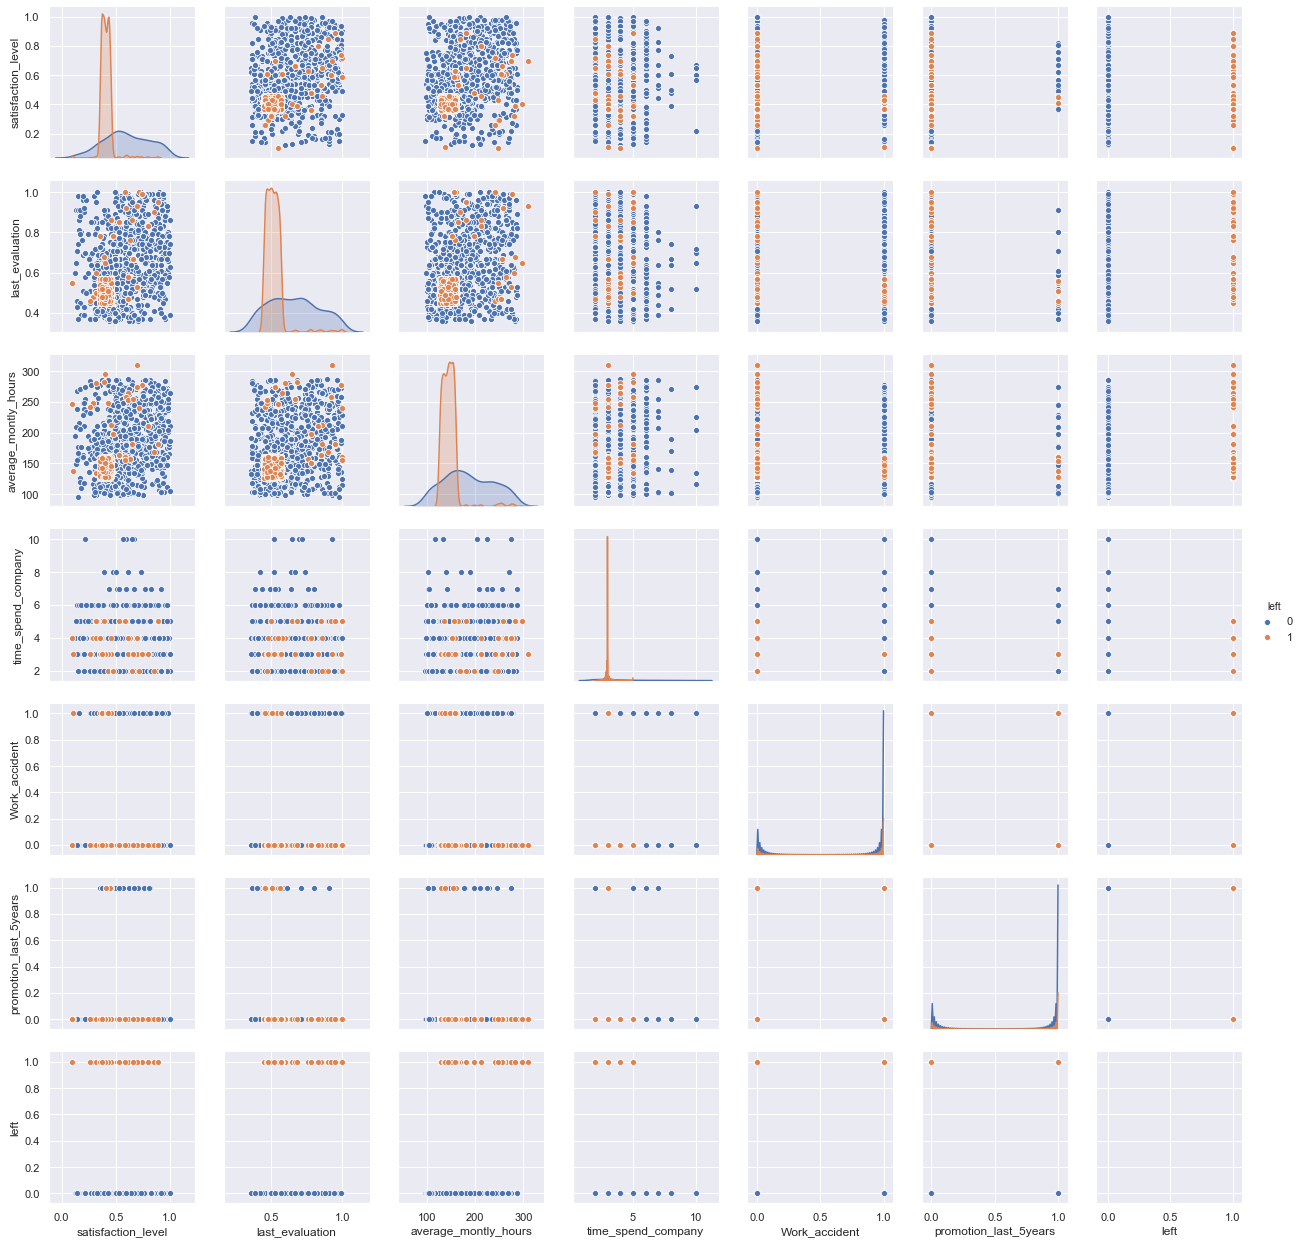

In [55]:
sns.pairplot(hr[hr.number_project == 2][['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left']], hue='left')

**Проект 2:** 
Во втором проекте виден кластер уволившихся сотрудников с низкими показателями (удовлетворенность, оценка и средние часы), проработавших в компании 3 года. В отличие уволившихся из от других проектов, уволившиеся из этого проекта сотрудники работали в компании не очень долго.

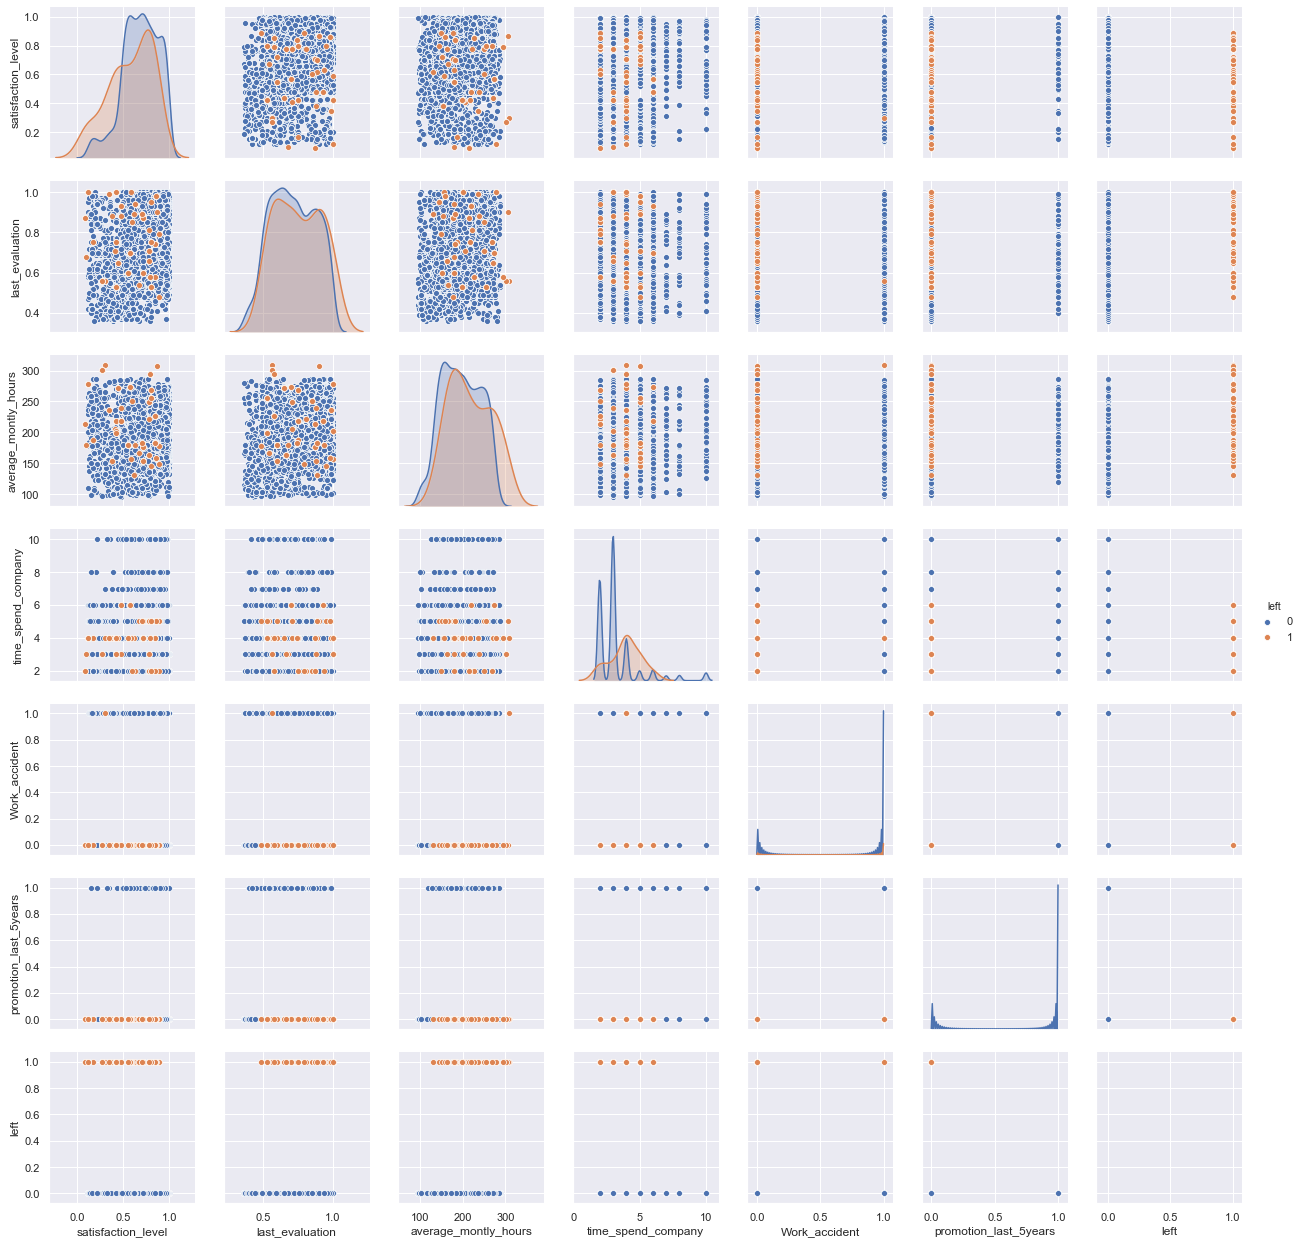

In [56]:
sns.pairplot(hr[hr.number_project == 3][['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left']], hue='left')

**Проект 3:** Уволившиеся имеют более низкий уровень удовлентворенности, работали немного больше часов и имеют бОльший стаж в компании

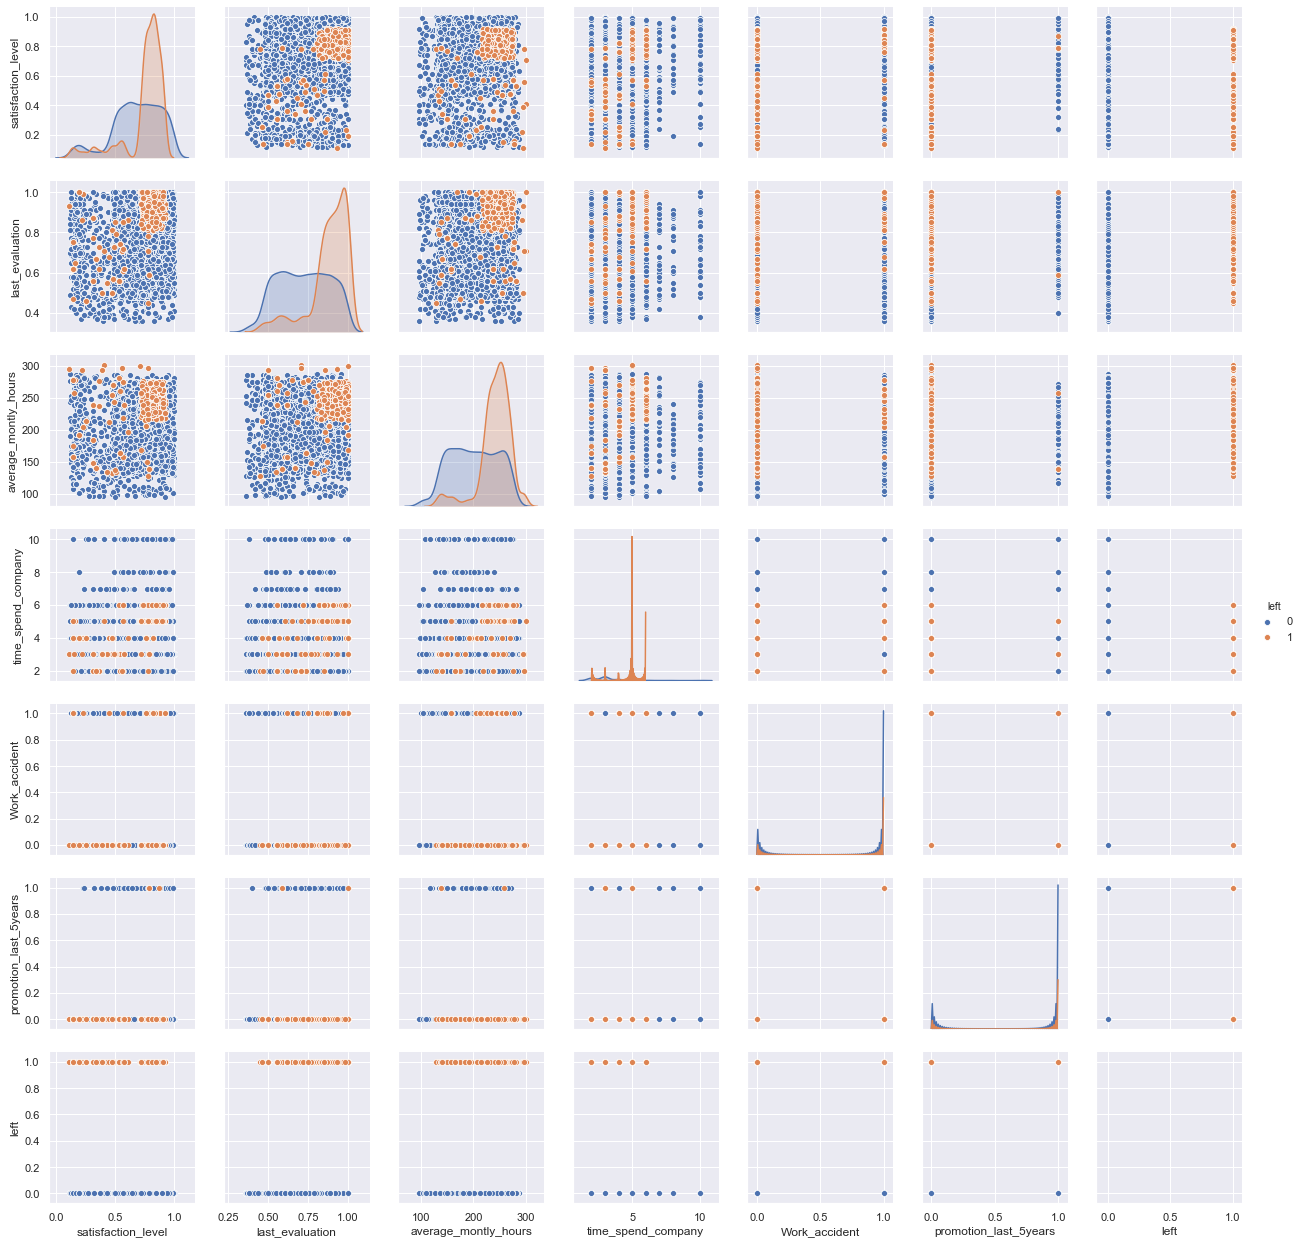

In [57]:
sns.pairplot(hr[hr.number_project == 4][['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left']], hue='left')

**Проект 4:** В четвертом проекте выделяется кластер high-fliers - сотрудников, которые много работали, имели высокую оценку и высокий уровень удовлетворенности, и при этом покинули компанию

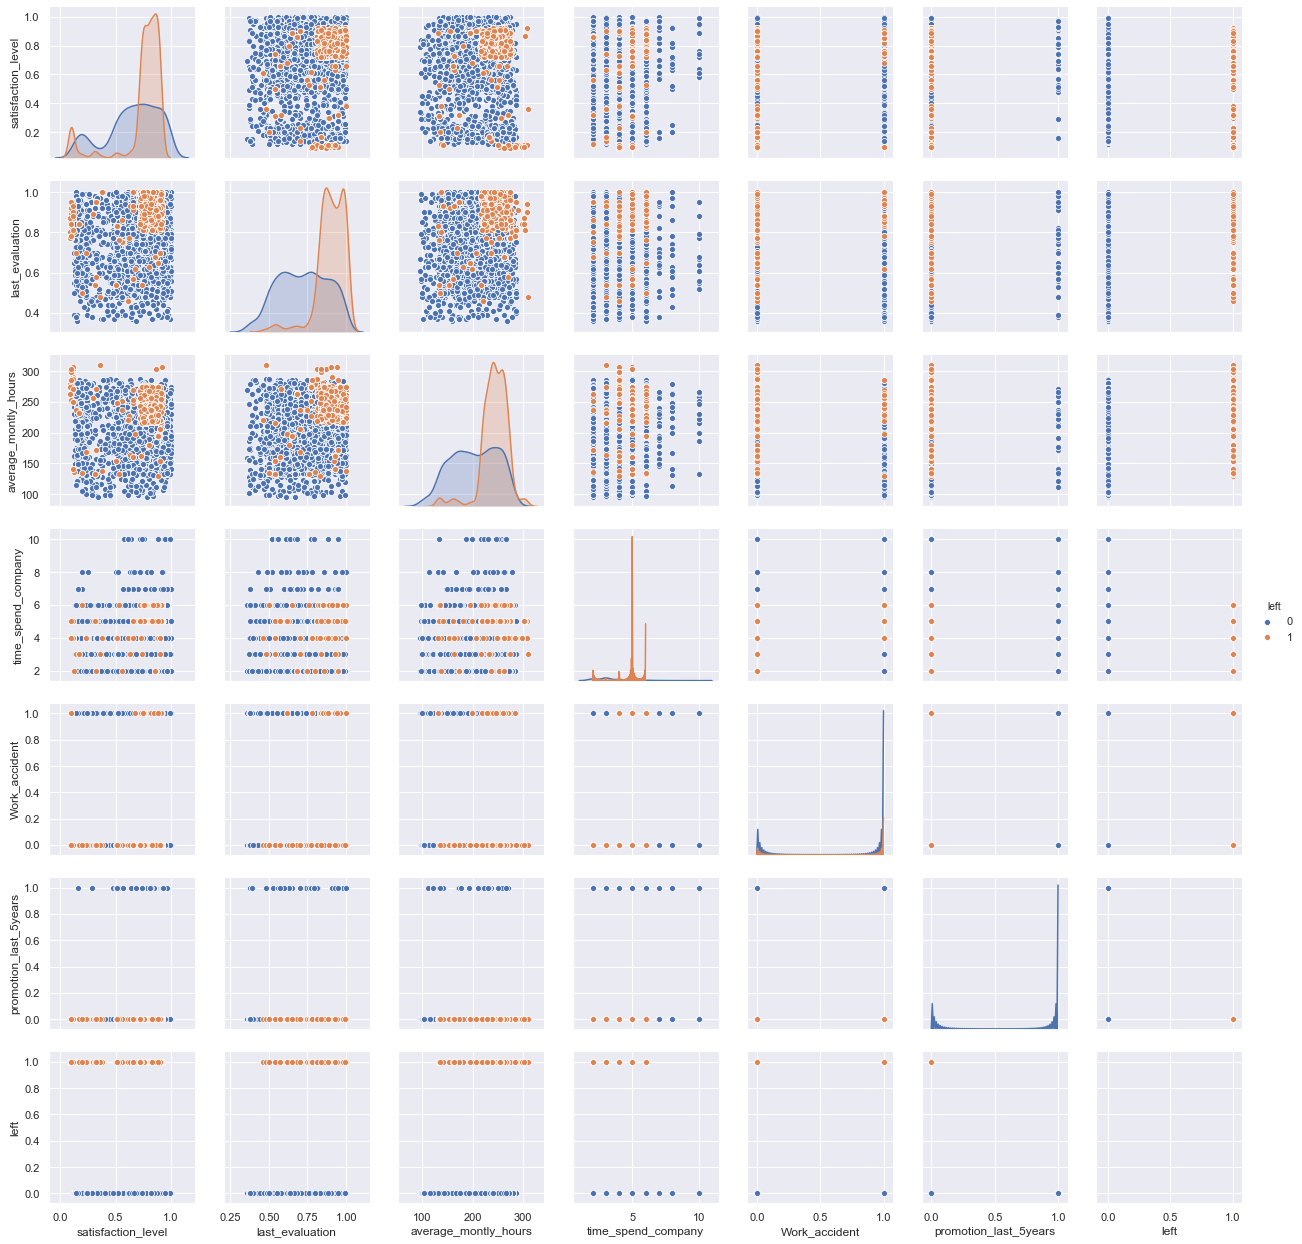

In [58]:
sns.pairplot(hr[hr.number_project == 5][['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left']], hue='left')

**Проект 5:** В пятом проекте также есть кластер сотрудников, покинувших компанию, с большим количеством часов имевших высокую оценкуб но часть из них имела низкий уровенности

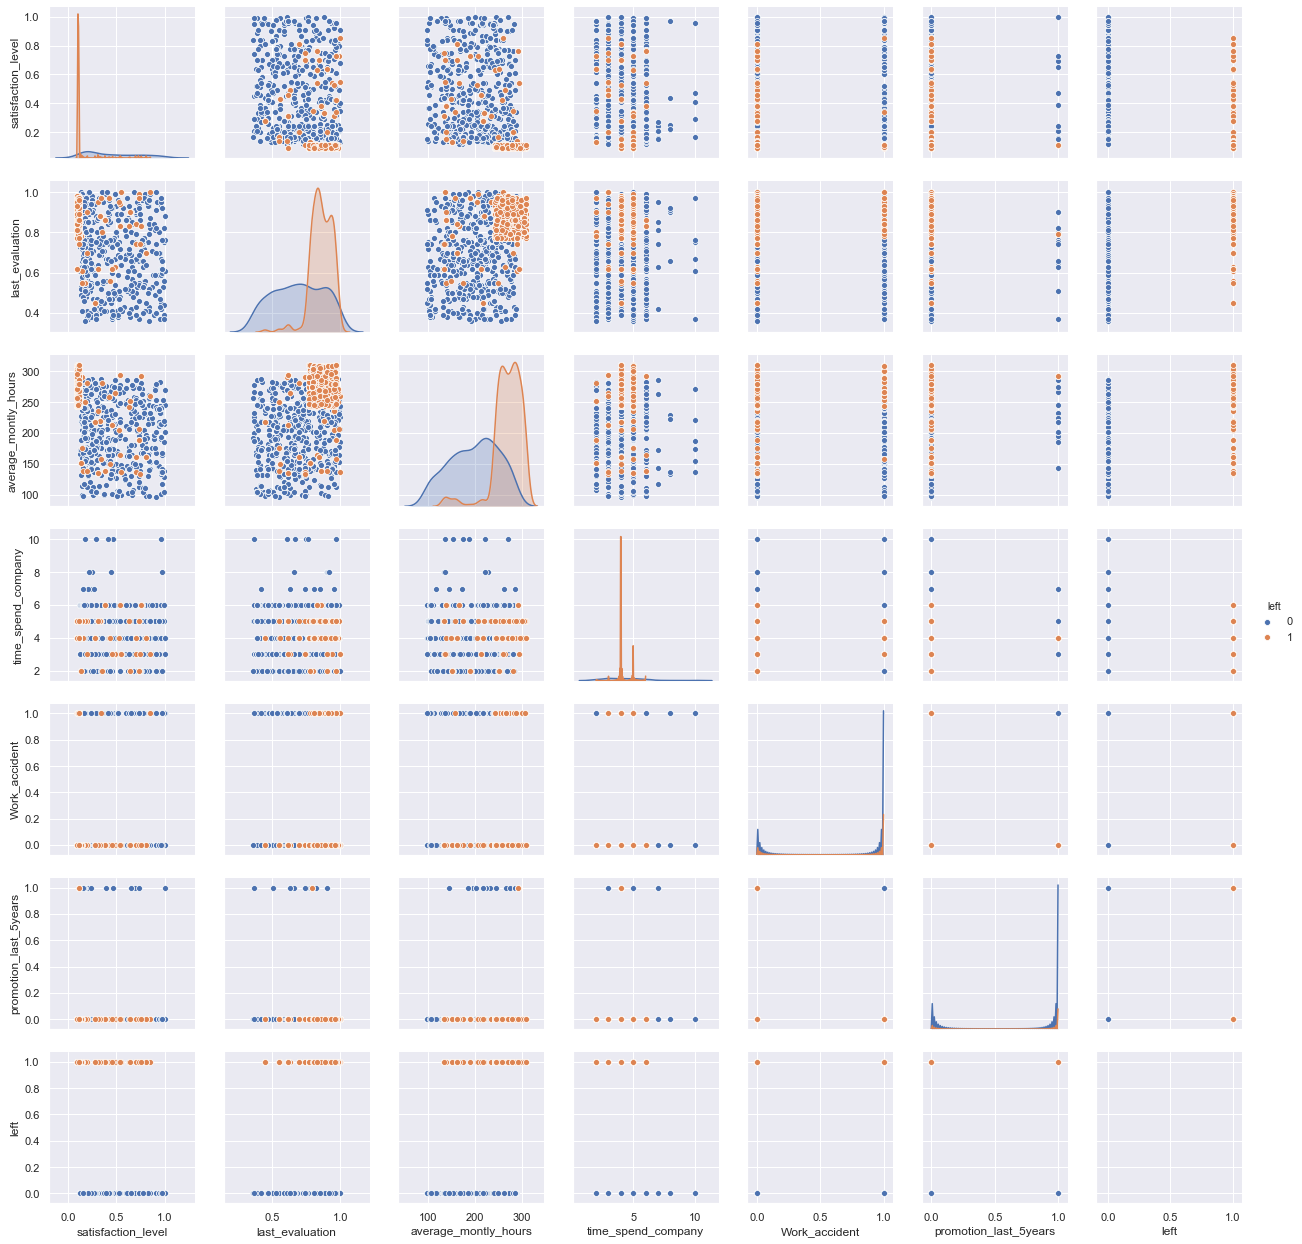

In [59]:
sns.pairplot(hr[hr.number_project == 6][['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left']], hue='left')

**Проект 6:** 
* В шестом проекте почти все сотрудники с большим количеством часов и высокой оценкой, покинувшие компанию, имели низкий уровень удовлетворенности.

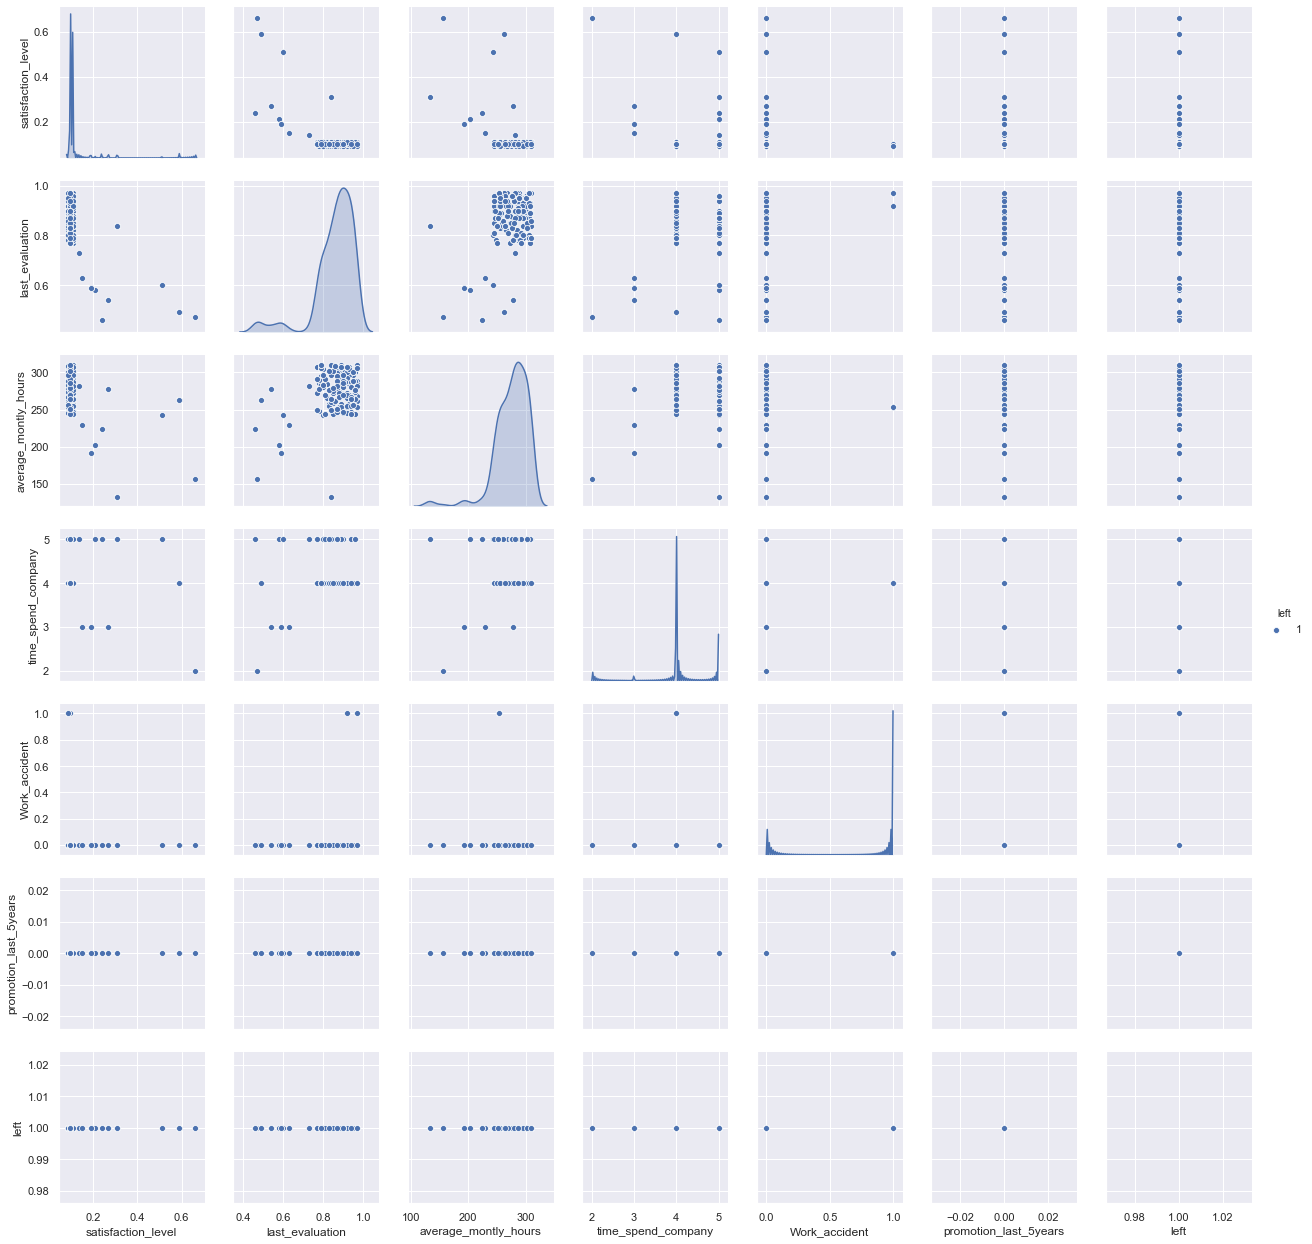

In [60]:
sns.pairplot(hr[hr.number_project == 7][['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left']], hue='left')

**Проект 7:** 
* Из этого проекта уволились (или были уволены) все сотрудники. 
* Большинство сотрудников отработало много часов, имели высокую оценку и, при этом, низкий уровень удовлетворенности. 
* Сотрудники в этом проекте проработали в компании дольше, чем в других, что может говорить о том, что это более старый проект.

In [61]:
hr.groupby(['number_project', 'left']).count()['sales'].unstack('left').style.bar()

Ttest_indResult(statistic=-39.90885134956341, pvalue=0.0)


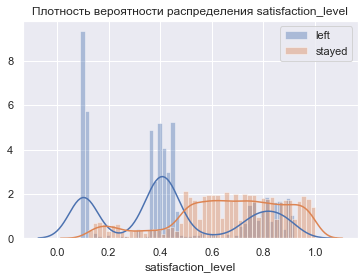

In [64]:
# Гипотеза 1
# Уровень удовлетворенности для уволившихся и оставшихся сотрудников не отличается

left = hr[hr.left == 1]['satisfaction_level']
stayed = hr[hr.left == 0]['satisfaction_level']

min_len = min(len(left), len(stayed))

left_s = left.sample(min_len)
stayed_s = stayed.sample(min_len)

print(stats.ttest_ind(left_s, stayed_s, equal_var=False))
   
sns.distplot(left, 50)
sns.distplot(stayed, 50)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['left', 'stayed'])
plt.show()

Проект 2:  Ttest_indResult(statistic=-25.272861257691698, pvalue=7.683846601531166e-108)


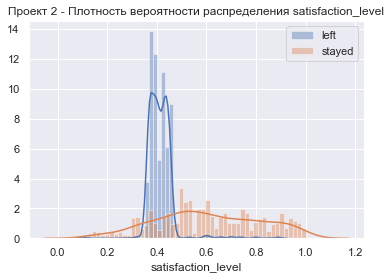

Проект 3:  Ttest_indResult(statistic=-1.1206412879968426, pvalue=0.26433494828364484)


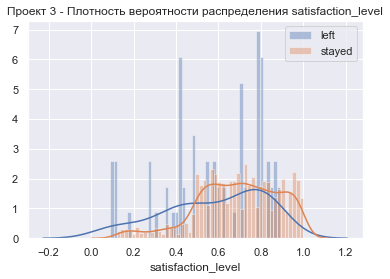

Проект 4:  Ttest_indResult(statistic=4.352936440634063, pvalue=1.5200556771137026e-05)


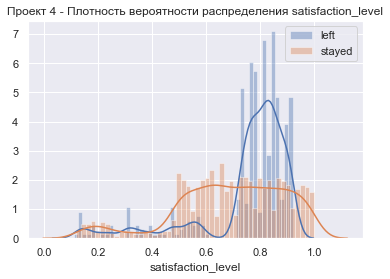

Проект 5:  Ttest_indResult(statistic=7.693143553590658, pvalue=2.977917792305518e-14)


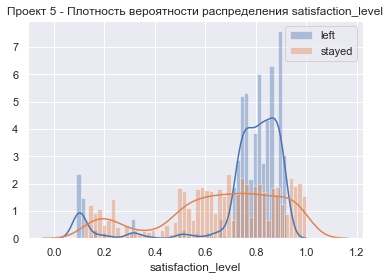

Проект 6:  Ttest_indResult(statistic=-25.233777663814084, pvalue=3.021822001146093e-100)


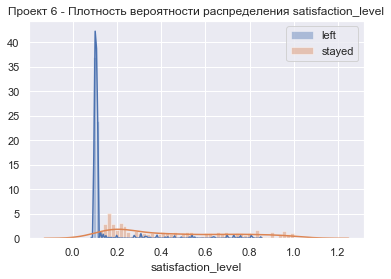

In [65]:
# посмотрим по проектам:

for np in range(2,7):
    hrp = hr[hr.number_project==np]

    left = hrp[hrp.left == 1]['satisfaction_level']
    stayed = hrp[hrp.left == 0]['satisfaction_level']

    min_len = min(len(left), len(stayed))

    left_s = left.sample(min_len)
    stayed_s = stayed.sample(min_len)

    print(f'Проект {np}: ', stats.ttest_ind(left_s, stayed_s, equal_var=False))
   
    
    sns.distplot(left, 50)
    sns.distplot(stayed, 50)
    plt.title(f'Проект {np} - Плотность вероятности распределения satisfaction_level')
    plt.legend(['left', 'stayed'])
    plt.show()

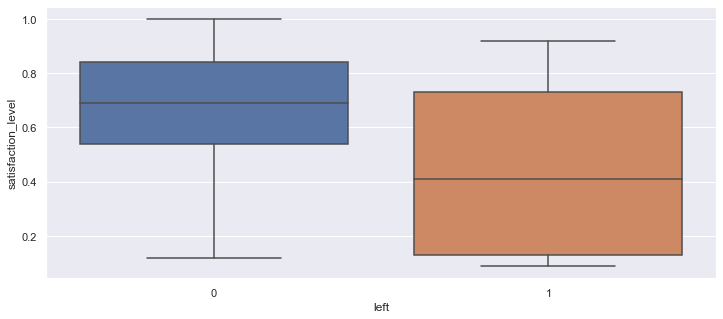

In [77]:
plt.rcParams['figure.figsize']=(12,5)
ax = sns.boxplot(x="left", y="satisfaction_level", data=hr)

### Вывод
* p-value < 0.05, как для компании в целом, так и для каждого проекта
* значит отвергаем нулевую гипотезу - т.е. уровень удовлетворенности для уволившихся и оставшихся сотрудников отличается
* нам неизвестно, является ли низкий уровень удовлетворенности следствием того, что сотрудников увольняют или увольняются сотрудники с низким уровнем удовлетворенности, но есть связь между этими показателями

Проект 2:  Ttest_indResult(statistic=-8.166913490561022, pvalue=1.1114666309384373e-15)


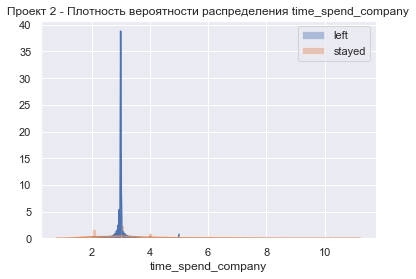

Проект 3:  Ttest_indResult(statistic=6.112398063921697, pvalue=1.0866773833864392e-08)


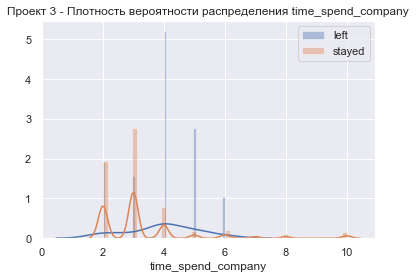

Проект 4:  Ttest_indResult(statistic=16.077582288901333, pvalue=3.0260964481981017e-49)


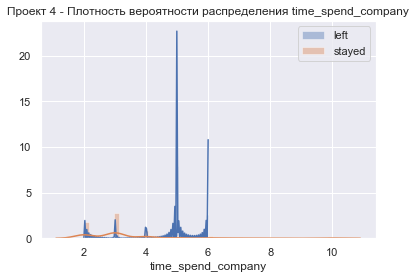

Проект 5:  Ttest_indResult(statistic=23.8409679842753, pvalue=1.1991625225635255e-96)


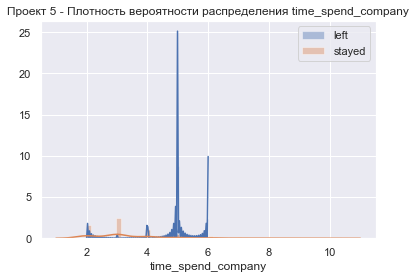

Проект 6:  Ttest_indResult(statistic=-3.105162421771484, pvalue=0.0019916919548059174)


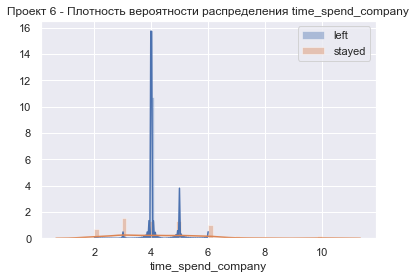

In [66]:
# Гипотеза 2
# Время работы в компании для уволившихся и оставшихся сотрудников не отличается

for np in range(2,7):
    hrp = hr[hr.number_project==np]

    left = hrp[hrp.left == 1]['time_spend_company']
    stayed = hrp[hrp.left == 0]['time_spend_company']

    min_len = min(len(left), len(stayed))

    left_s = left.sample(min_len)
    stayed_s = stayed.sample(min_len)

    print(f'Проект {np}: ', stats.ttest_ind(left_s, stayed_s, equal_var=False))
   
    
    sns.distplot(left, 50)
    sns.distplot(stayed, 50)
    plt.title(f'Проект {np} - Плотность вероятности распределения time_spend_company')
    plt.legend(['left', 'stayed'])
    plt.show()

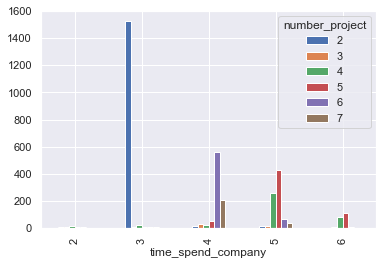

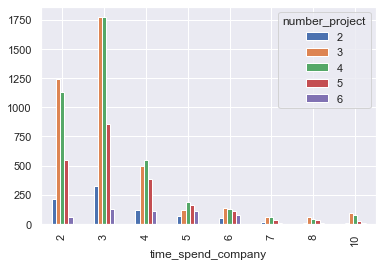

In [67]:
hr[hr.left==1].groupby(['number_project', 'time_spend_company']).count()['sales'].unstack('number_project').plot(kind='bar')

hr[hr.left==0].groupby(['number_project', 'time_spend_company']).count()['sales'].unstack('number_project').plot(kind='bar')

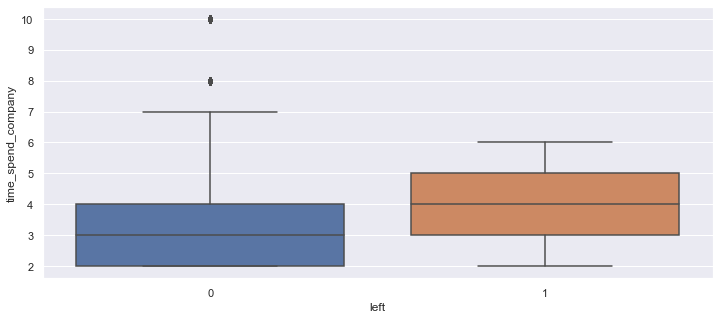

In [79]:
plt.rcParams['figure.figsize']=(12,5)
ax = sns.boxplot(x="left", y="time_spend_company", data=hr)

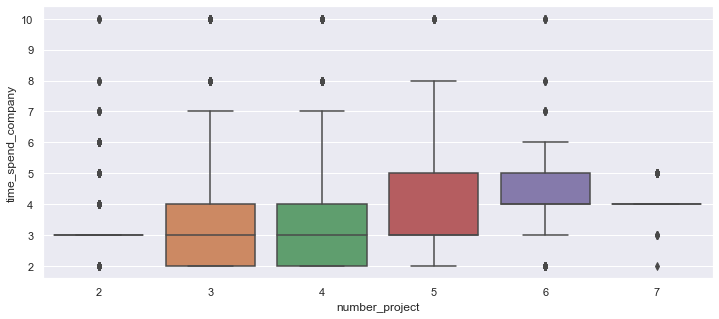

In [80]:
plt.rcParams['figure.figsize']=(12,5)
ax = sns.boxplot(x="number_project", y="time_spend_company", data=hr)

### Вывод

* p-value < 0.05, 
* значит отвергаем нулевую гипотезу - т.е. количество проработанных в компании лет уволившихся и оставшихся сотрудников отличается
* на графиках видно, что среди ушедших большинство сотрудников проработало 3-5 лет, тогда как оставшиеся либо работают в компании долго (8-10 лет), либо новички (2-3 года)

# Общие выводы

1. Очевидно, что компания занимается проектой деятельностью. 
Срок жизни проекта, в большинстве случаев, 4-5 лет.
Исключение составляет второй проект, из которого большинство сотрудников уволены в третий год работы.


2. У ушедших сотрудников, в среднем, более низкий уровень удовлетворенности.
При этом, трудно сказать что здесь причина, а что следствие.


3. Нагрузка (количество отработанных часов) также зависит от проекта и, похоже, на завершающей стадии проекта люди работают больше. Также, сотрудники проектов на завершающей стадии получают более высокие оценки. 
Опять выделяется второй проект, где количество отработанных часов, наоборот, очень низкое. Похоже, что-то с ним пошло не так - либо с задачей не справились (что может быть причиной низких оценок на этом проекте), либо проект было решено закрыть из-за невостребованности или каких-то иных внешних причин.


4. Подразделение в котором работает сотрудник, размер его заработной платы и были ли несчастные случаи практически не влияют на уйдет сотрудник или останется. Также, бросается в глаза очень маленькое количество повышений, что также свидетельствует о проектной структуре компании. Только среди сотрудников с высокой зарплатой и сотрудников в подразделении менеджмент процент увольнений ниже, чем в других грейдах и других подразделениях.
